# 22. GRADUATE ADMISSIONS: EXPLORATIVE DATA ANALYSIS
---

## 1. Introducing the Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admission = pd.read_csv('data/Admission2_train')
print('Rows, Columns:', admission.shape)
print('Missing Values:', admission.isnull().sum().sum())
admission.head()

Rows, Columns: (400, 8)
Missing Values: 0


,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,321,111,3,3.5,8.83,1,4.0,0.77
1,316,111,4,4.0,8.54,0,5.0,0.71
2,303,102,3,3.5,8.50,0,3.0,0.62
3,314,107,2,2.5,8.27,0,4.0,0.72
4,308,106,3,3.5,8.21,1,2.5,0.75


## 2. Exploring Correlation

In [2]:
corr_matrix = admission.corr()
sorted_corr = corr_matrix['Chance of Admit'].sort_values(ascending=False)
sorted_corr

Chance of Admit      1.000
CGPA                 0.878
GRE Score            0.821
TOEFL Score          0.789
SOP                  0.680
University Rating    0.679
LOR                  0.627
Research             0.544
Name: Chance of Admit, dtype: float64

Text(0.5, 0, 'Features')

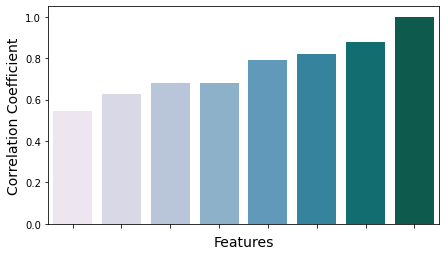

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,4))
ax = sns.barplot(x=sorted_corr.index, y=sorted_corr.values, 
                 data=sorted_corr, palette='PuBuGn')
ax.get_xaxis().set_ticklabels([])
plt.ylabel('Correlation Coefficient', size=14)
plt.xlabel('Features', size=14)

## 3. Correlation Heatmap

<AxesSubplot:>

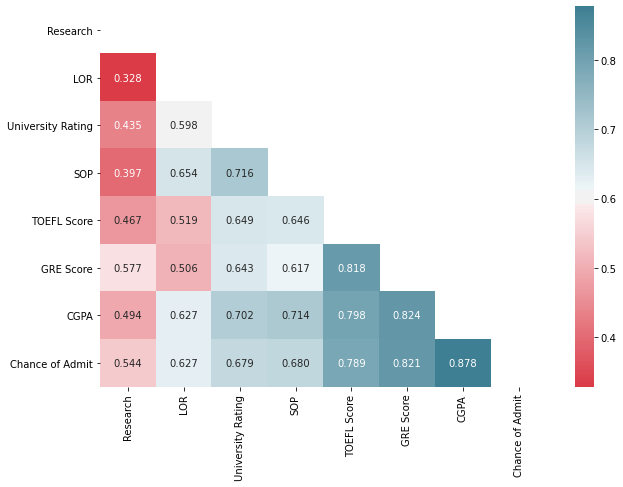

In [4]:
sorted_corr_ = corr_matrix['Chance of Admit'].sort_values()
corr = admission[sorted_corr_.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})

## 4. Correlation Plots
Let's plot the top correlations for clarity.

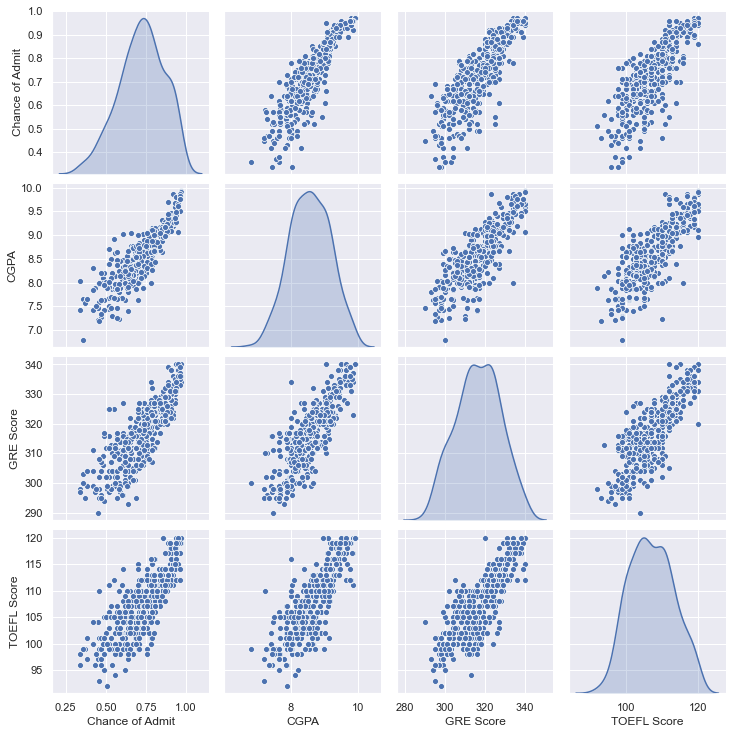

In [10]:
sns.set(color_codes=True)
hi_corr = ['Chance of Admit', 'CGPA', 'GRE Score', 'TOEFL Score']
sns.pairplot(admission[hi_corr], kind="scatter", diag_kind="kde", palette="Set2")

## 5. Deeper Look into Top 3 Correlations
#### i. CGPA

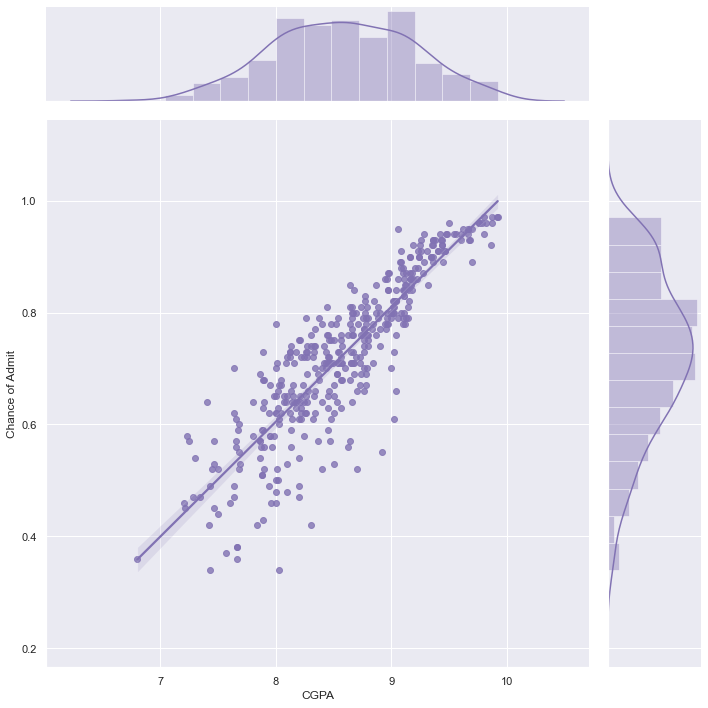

In [6]:
sns.jointplot(x='CGPA', y='Chance of Admit', data=admission, 
              kind="reg", height=10, color='m')

#### ii. GRE Score

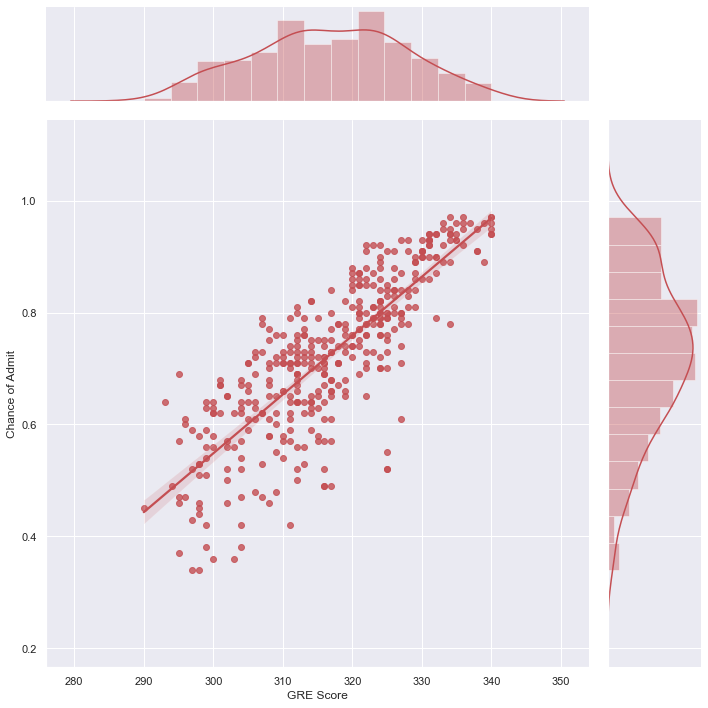

In [7]:
sns.jointplot(x='GRE Score', y='Chance of Admit', data=admission, 
              kind="reg", height=10, color='r')

#### iii. TOEFL Score

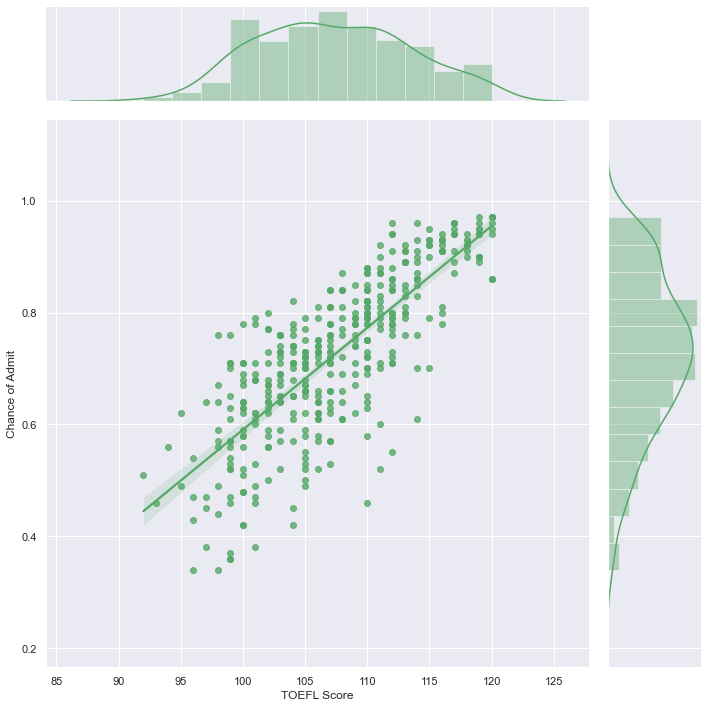

In [8]:
sns.jointplot(x='TOEFL Score', y='Chance of Admit', data=admission, 
              kind="reg", height=10, color='g')

## 6. Discretizing Continuous Features
Let's bin continuous features to range between 1 and 5 in 9 scales.

In [12]:
print('CGPA_min:', admission['CGPA'].min())
print('CGPA_min:', admission['CGPA'].max())
print('CGPA_range:', admission['CGPA'].max()-admission['CGPA'].min())
print('CGPA_width:', (admission['CGPA'].max()-admission['CGPA'].min())/9)

CGPA_min: 6.8
CGPA_min: 9.92
CGPA_range: 3.12
CGPA_width: 0.3466666666666667


In [13]:
from sklearn.preprocessing import KBinsDiscretizer

binner = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='uniform')
bin_cols = ['CGPA', 'GRE Score', 'TOEFL Score']
admission_1 = admission.copy()
admission_1[bin_cols] = binner.fit_transform(admission_1[bin_cols])
admission_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,5.0,6.0,3,3.5,5.0,1,4.0,0.77
1,4.0,6.0,4,4.0,5.0,0,5.0,0.71
2,2.0,3.0,3,3.5,4.0,0,3.0,0.62
3,4.0,4.0,2,2.5,4.0,0,4.0,0.72
4,3.0,4.0,3,3.5,4.0,1,2.5,0.75


In [14]:
binner.bin_edges_

array([array([6.8       , 7.14666667, 7.49333333, 7.84      , 8.18666667,
       8.53333333, 8.88      , 9.22666667, 9.57333333, 9.92      ]),
       array([290.        , 295.55555556, 301.11111111, 306.66666667,
       312.22222222, 317.77777778, 323.33333333, 328.88888889,
       334.44444444, 340.        ]),
       array([ 92.        ,  95.11111111,  98.22222222, 101.33333333,
       104.44444444, 107.55555556, 110.66666667, 113.77777778,
       116.88888889, 120.        ])], dtype=object)

## 7. Plotting Discretized Features

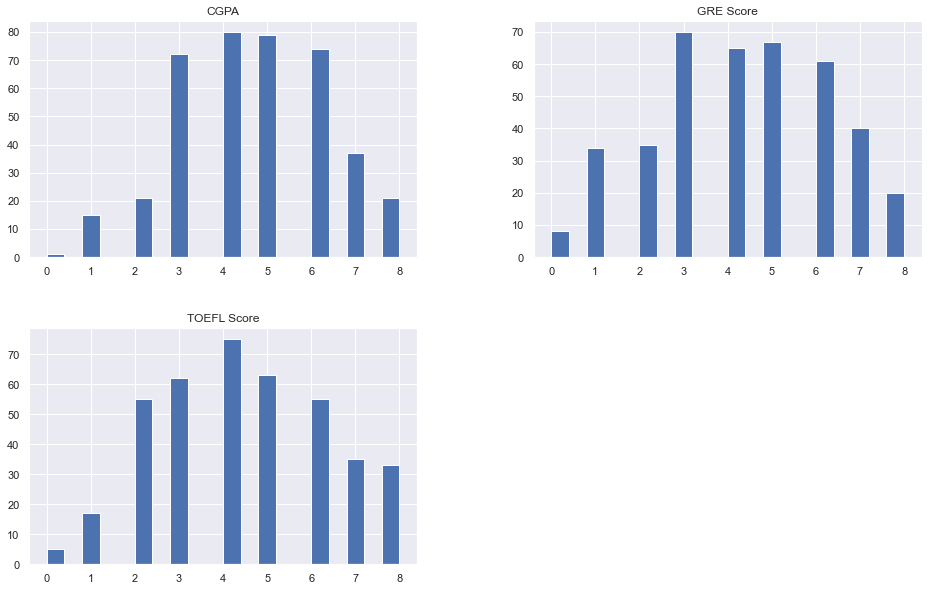

In [24]:
admission_1[bin_cols].hist(bins=20, figsize=(16,10))
plt.show()

## 8. Correlation Plots after Discretization

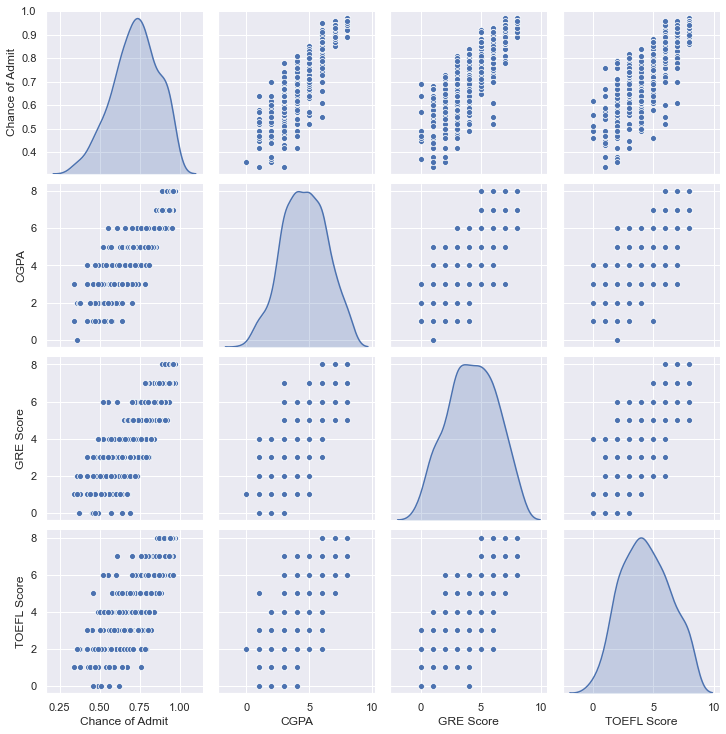

In [25]:
sns.pairplot(admission_1[hi_corr], kind="scatter", diag_kind="kde", palette="Set2")

## 9. Regression Plots after Discretization

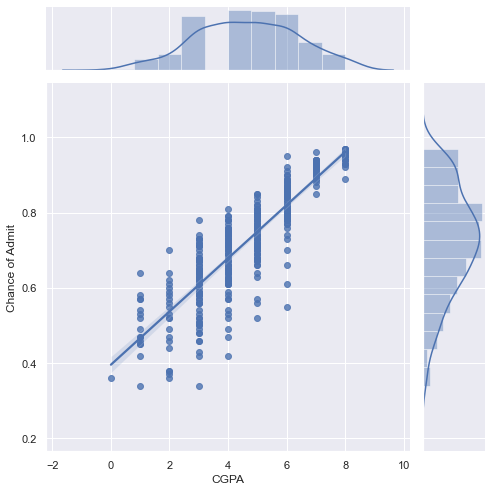

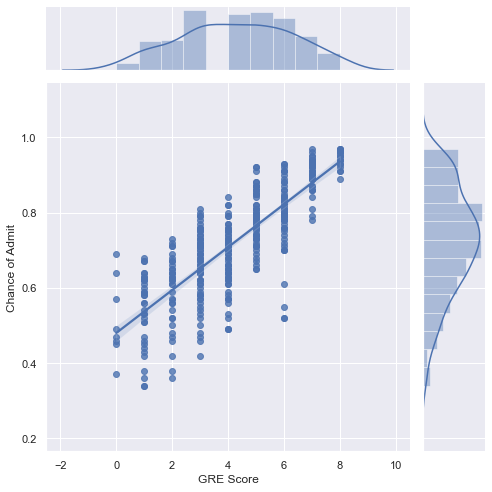

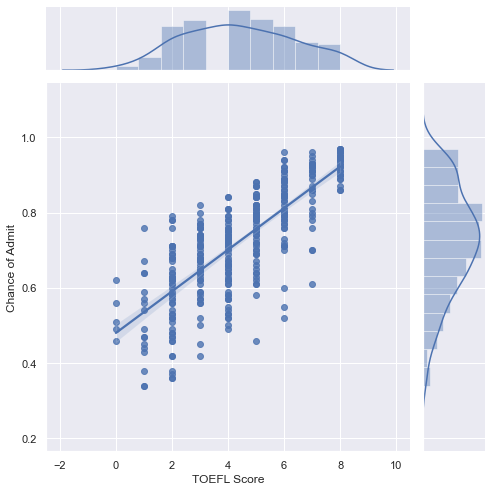

In [39]:
for col in bin_cols:    
    sns.jointplot(x=col, y='Chance of Admit', data=admission_1, 
              kind="reg", height=7)
    

## 10. Plotting an Estimate of Central Tendency

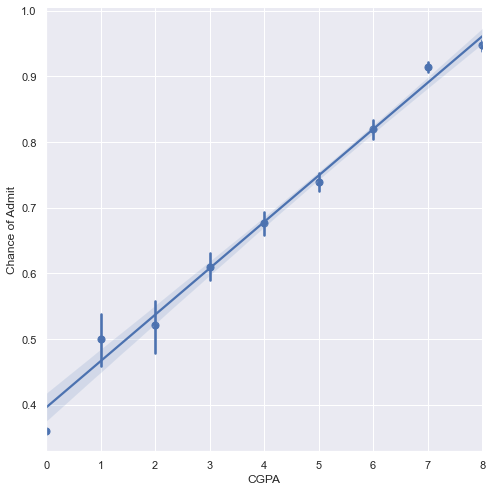

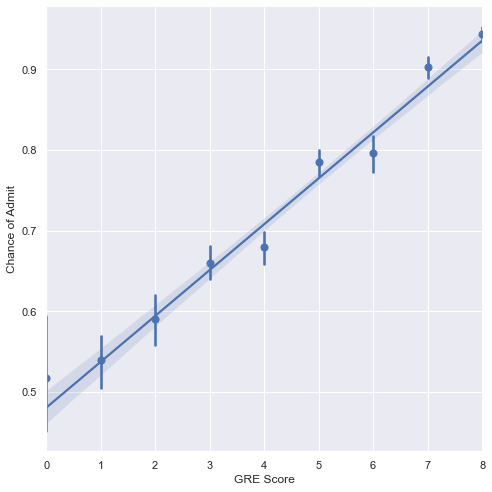

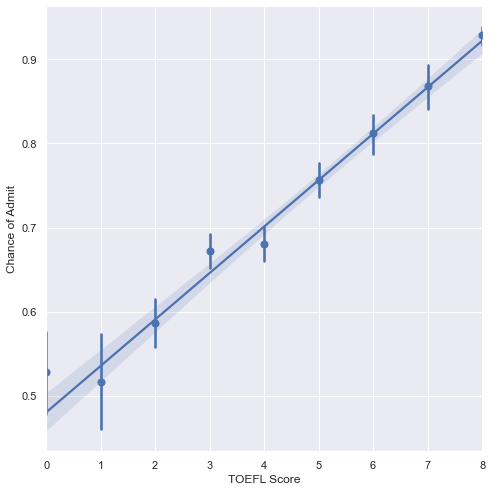

In [40]:
for col in bin_cols:    
    sns.lmplot(x=col, y='Chance of Admit', data=admission_1, 
              x_estimator=np.mean, height=7)

## 11. Correlation Heatmap before and after Binning
#### i. Before

<AxesSubplot:>

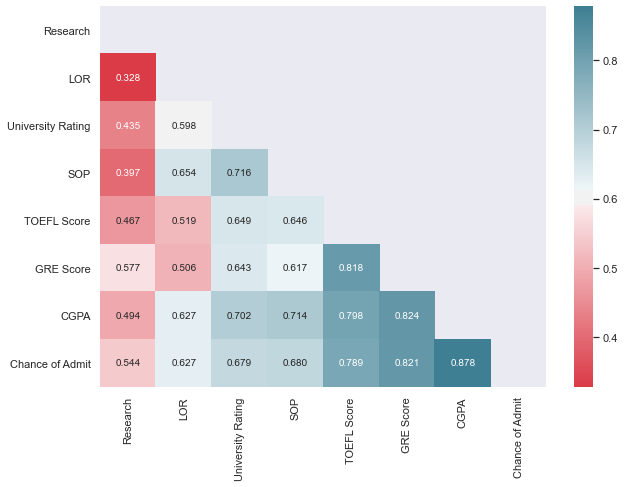

In [44]:
sorted_corr_ = corr_matrix['Chance of Admit'].sort_values()
corr = admission[sorted_corr_.index].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})

#### ii. After

<AxesSubplot:>

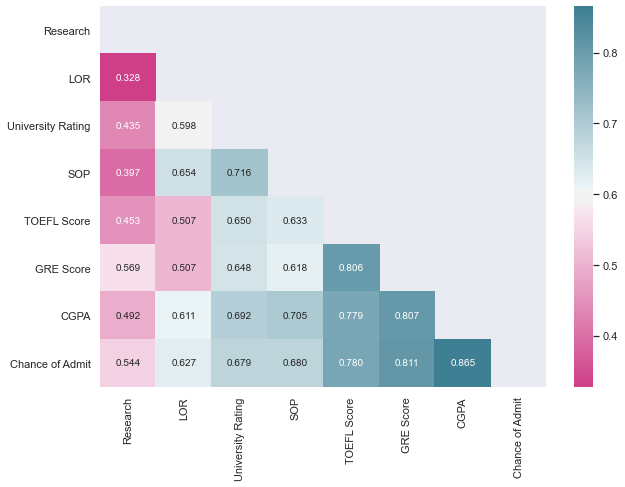

In [50]:
corr_matrix_1 = admission_1.corr()
sorted_corr_1 = corr_matrix_1['Chance of Admit'].sort_values()
corr_1 = admission_1[sorted_corr_1.index].corr()
mask = np.triu(np.ones_like(corr_1, dtype=np.bool))
color = sns.diverging_palette(-15, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_1, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 10})

There is a slight change in correlation coefficients after binning continuous features. We will train models with and without binning to see which one produces the best results.

Next: `FEATURE ENGINEERING AND MOE